# Data Science And Materials Informatics

## Hands-on Week 3: Visualization *[3 exercises to complete]*

Reference: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

It is always good practice to import modules at the beginning of a notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

The plt interface is what we will use most often.

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command. To render matplotlib figures inline with notebook cells, we can use:

In [3]:
%matplotlib inline

We can use ``mpl.style.use`` to alter the plot style. Find the list of matplotlib styles [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

### 1. Pandas

#### 1.1 Read in data

We'll use pandas read_csv function to read in our data.

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')

Let's take a look at the data to make sure it looks right with head and tail, and then look at the shape of the dataframe:

In [5]:
df.columns

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [6]:
df.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


In [7]:
df.tail()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
113,114,Flerovium,Fl,289.0,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.0,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.0,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.0,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0
117,118,Oganesson,Og,294.0,176,118,118,7,18.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,7,8.0


In [8]:
df.shape

(118, 28)

We can use this to try some of our plotting functions. We will start with two variables in the datasets, AtomicNumber and Density. 

First of all, we notice there are some missing density data. We would like to drop rows with missing data in Density column:

In [9]:
df_d = df.dropna(subset=['Density'])

In [10]:
df_d.shape

(105, 28)

#### 1.2 Pandas built-in object-oriented plotting methods

There are multiple packages we can use for plotting. Pandas has some built-in object-oriented methods we can try first.

*Here are some simple and quick examples:* https://www.w3schools.com/python/pandas/pandas_plotting.asp

<AxesSubplot:xlabel='AtomicNumber', ylabel='Density'>

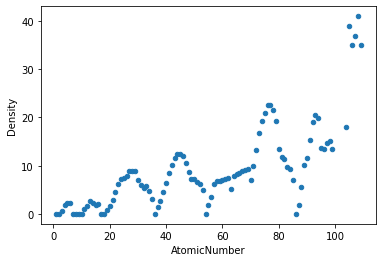

In [11]:
df_d.plot.scatter('AtomicNumber', 'Density')

The default plot settings are pretty ugly. We can take advantage of the object-oriented nature of pandas plots to modify the output, like adding a title, adding gridlines, making the y-axis label more accurate, increasing size, and adjusting the aspect ratio.

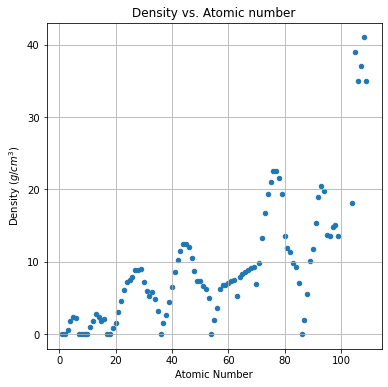

In [12]:
density_plot = df_d.plot.scatter('AtomicNumber', 'Density', figsize=(6, 6))
density_plot.set_xlabel('Atomic Number')
density_plot.set_ylabel('Density $(g/cm^3)$')
density_plot.set_title('Density vs. Atomic number')
density_plot.grid()

Here we used LaTeX notation to create the unit of density. LaTeX can be used to generate mathematical expressions, symbols, and Greek letters for figures. One reference guide is included here: https://www.overleaf.com/learn/latex/Mathematical_expressions

#### Exercise 1: Generate a single figure that reflects the following changes to the figure above: 
* change the x range to be 0 to 120
* change the y range to be 0 to 45
* change the font size to 16
* change the color of plotting to red.

You can access the Pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/visualization.html).

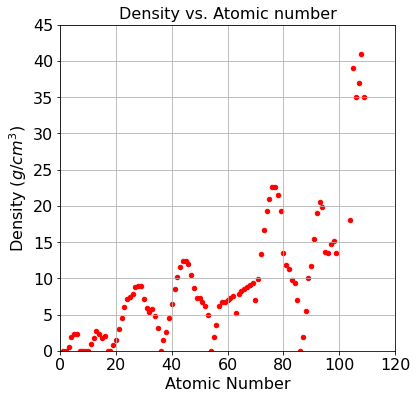

In [13]:
density_plot = df_d.plot.scatter('AtomicNumber', 'Density', figsize=(6, 6),color ='red', fontsize=16)
density_plot.set_xlabel('Atomic Number',fontdict={'fontsize':16})
density_plot.set_ylabel('Density $(g/cm^3)$',fontdict={'fontsize':16})
density_plot.set_title('Density vs. Atomic number',fontdict={'fontsize':16})
density_plot.set_xlim([0,120])
density_plot.set_ylim([0,45])
density_plot.grid()

### 2. Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. 

#### 2.1 MATLAB-style Interface: Pyplot (``plt``)

*Simple Matplotlib and Pyplot tutorial (recommended for those not already familiar with these): https://matplotlib.org/stable/tutorials/introductory/quick_start.html*

#### We'll use Matplotlib to plot MeltingPoint and BoilingPoint vs. AtomicNumber in the same figure.

In [14]:
# drop rows with missing data in either MeltingPoint or BoilingPoint
df_mb = df.dropna(subset=['MeltingPoint', 'BoilingPoint'])
df_mb.shape

(97, 28)

Text(0.5, 1.0, 'Melting & Boiling Point vs. Atomic Number')

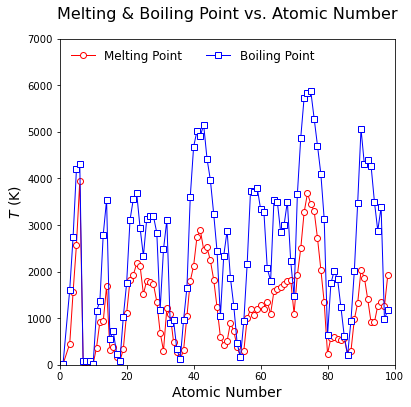

In [15]:
fig1 = plt.figure(figsize=(6, 6))
plt.plot(df_mb['AtomicNumber'], df_mb['MeltingPoint'], 
         '-o', label='Melting Point', color='r', linewidth=1, 
         markerfacecolor='white', markeredgecolor='r') # Adjust line/marker colors and styles; label each line
plt.plot(df_mb['AtomicNumber'], df_mb['BoilingPoint'], 
         '-s', label='Boiling Point', color='b', linewidth=1, 
         markerfacecolor='white', markeredgecolor='b')
plt.xlim(0, 100) # Adjust axes limits
plt.ylim(0, 7000)
plt.xlabel('Atomic Number', fontsize=14) # Add axes labels
plt.ylabel('$T$ (K)', fontsize=14)
plt.legend(loc='upper left', fontsize=12, frameon=False, ncol=2) # Create and customize plot legend
plt.title('Melting & Boiling Point vs. Atomic Number', fontsize=16, pad=20) # Add a title

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats using the ``savefig()`` command. For example, to save the above figure as a PNG file in current directory. *Please see Supplementary Material 1 at the bottom of this Notebook for a quick demonstration on file paths.*

In [16]:
fig1.savefig('figure1fig.png')

To find out more information about ``plot()`` function, take a look at the built-in documentation for it.

In [17]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

#### A simple way to plot 3D data by varying the size/color of the points with z:

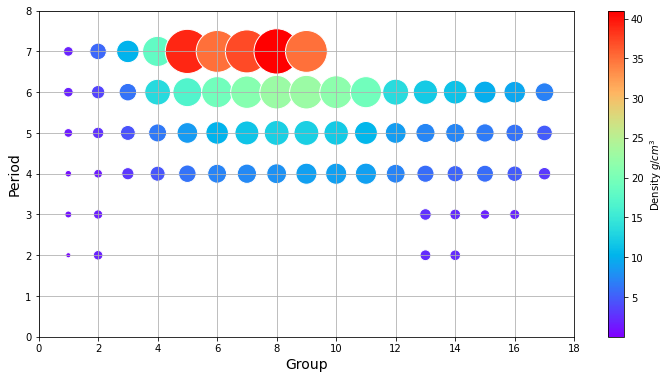

In [18]:
# plot Period-Group-Density, with the size of the points propotional to density.
plt.figure(figsize=(12, 6))
plt.scatter(df_d['Group'], df_d['Period'], 
            s=df_d['Density']*50, c=df_d['Density'], cmap='rainbow',edgecolor='white')
plt.xlim(0, df_d['Group'].max())
plt.ylim( 0,df_d['Period'].max()+1)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Period', fontsize=14)
plt.colorbar(label='Density $g/cm^3$')
#plt.savefig('figure1fig.png')
plt.grid()

#### Use MATLAB-style interface to plot MeltingPoint and BoilingPoint vs. AtomicNumber in two subplots:

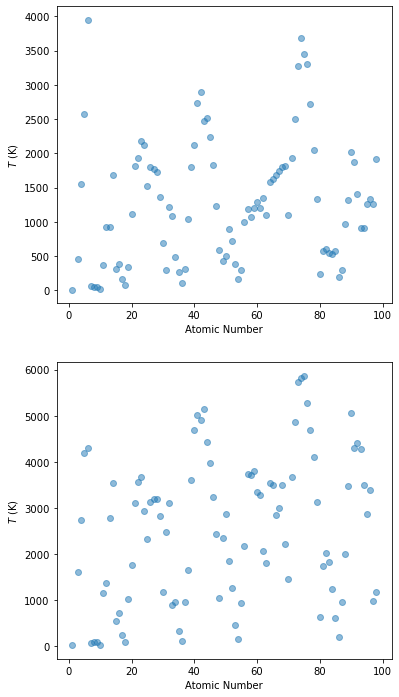

In [19]:
# create a plot figure
plt.figure(figsize=(6, 12))

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.scatter(df_mb['AtomicNumber'], df_mb['MeltingPoint'], alpha=0.5)
plt.xlabel('Atomic Number')
plt.ylabel('$T$ (K)')

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.scatter(df_mb['AtomicNumber'], df_mb['BoilingPoint'], alpha=0.5)
plt.xlabel('Atomic Number')
plt.ylabel('$T$ (K)')

plt.show()

It is important to note that this interface keeps track of the "current" figure and axes, which are where all plt commands are applied. While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, going back and adding something to the first panel will be a bit clunky. Fortunately, there is a better way - the object-oriented interface.

#### Exercise 2: Improve the above subplots with MATLAB-style interface: Change the range of x and y axes, add titles, increase font size, change colors and transparency, and change the margins and layout so they are side by side in a single row. Optional: Feel free to make other improvements! 

In [20]:
df_mb['MeltingPoint'].shape

(97,)

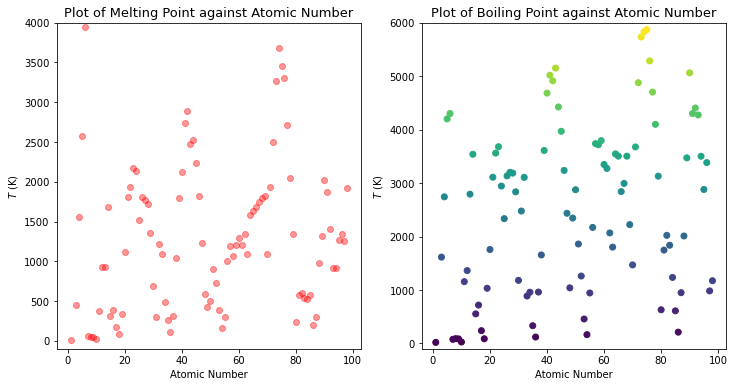

In [21]:
rng = np.random.RandomState(0)
colors = rng.rand(97)
# create a plot figure
plt.figure(figsize=(12, 6))

# create the first of two panels and set current axis
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.scatter(df_mb['AtomicNumber'], df_mb['MeltingPoint'], alpha=0.4,color='red')
plt.xlabel('Atomic Number')
plt.ylim(-100,4000)
plt.ylabel('$T$ (K)')
plt.title('Plot of Melting Point against Atomic Number',fontsize = 13)

# create the second panel and set current axis
plt.subplot(1, 2, 2)
plt.scatter(df_mb['AtomicNumber'], df_mb['BoilingPoint'],c=df_mb['BoilingPoint'],cmap='viridis')
#plt.colorbar(label="T(K)", orientation="vertical")
plt.xlabel('Atomic Number')
plt.ylim(-100,6000)
plt.ylabel('$T$ (K)')
#plt.yticks([])
plt.title('Plot of Boiling Point against Atomic Number',fontsize = 13)

plt.show()

#### 2.2 Object-oriented Interface: ``Figure`` and ``Axes``

The object-oriented interface works well with those more complicated situations. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit ``Figure`` and ``Axes`` objects.

#### Next, we'll use object-oriented interface to plot MeltingPoint and BoilingPoint vs. AtomicNumber in two subplots.

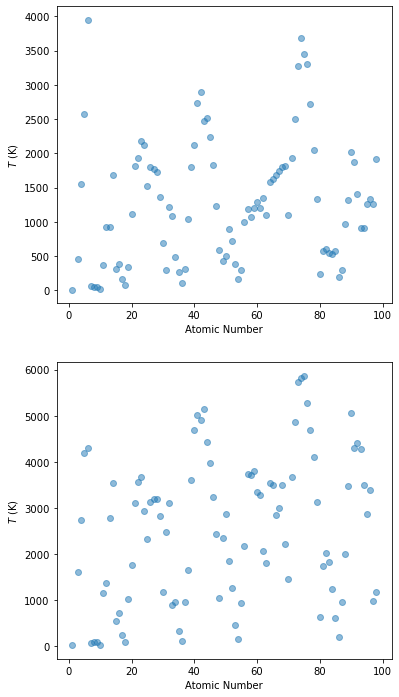

In [22]:
m_b_plot = plt.figure(figsize=(6, 12))
m_b_plot.subplots_adjust(hspace=0.2, wspace=0.2)
ax1, ax2 = m_b_plot.add_subplot(2, 1, 1), m_b_plot.add_subplot(2, 1, 2)

ax1.scatter(df_mb['AtomicNumber'], df_mb['MeltingPoint'], alpha=0.5)
ax1.set_xlabel('Atomic Number')
ax1.set_ylabel('$T$ (K)')

ax2.scatter(df_mb['AtomicNumber'], df_mb['BoilingPoint'], alpha=0.5)
ax2.set_xlabel('Atomic Number')
ax2.set_ylabel('$T$ (K)');

#### Alternatively, ``plt.subplots()`` can create a large grid of subplots in one go (note the ``s`` at the end of ``subplots``).

Also, use the ``axes.set()`` method to set  limits, labels, and titles at once.

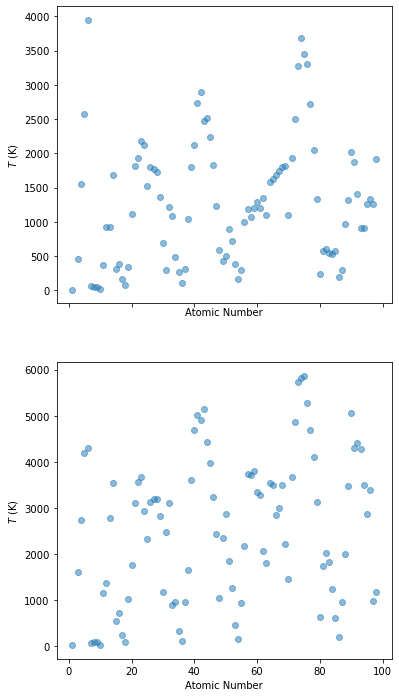

In [23]:
fig, axes = plt.subplots(2, 1, sharex='col', sharey='row', figsize=(6, 12))

axes[0].scatter(df_mb['AtomicNumber'], df_mb['MeltingPoint'], alpha=0.5)
axes[0].set(xlabel='Atomic Number', ylabel='$T$ (K)')

axes[1].scatter(df_mb['AtomicNumber'], df_mb['BoilingPoint'], alpha=0.5)
axes[1].set(xlabel='Atomic Number', ylabel='$T$ (K)');

#### Exercise 3: Improve the above subplots with object-oriented interface: Change the range of x and y axes, add titles, increase font size, change colors and transparency, and change the margins and layout so they are side by side in a row. Optional: Feel free to make other improvements! 

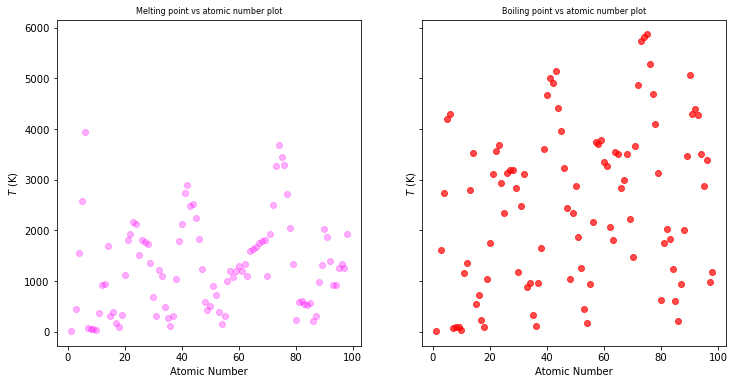

In [26]:
fig, axes = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(12, 6))

plt.rc('axes', titlesize=1)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels

axes[0].scatter(df_mb['AtomicNumber'], df_mb['MeltingPoint'], alpha=0.3,color='magenta')
axes[0].set(xlabel='Atomic Number', ylabel='$T$ (K)',title = 'Melting point vs atomic number plot')


axes[1].scatter(df_mb['AtomicNumber'], df_mb['BoilingPoint'], alpha=0.7,color='red')
axes[1].set(xlabel='Atomic Number', ylabel='$T$ (K)',title = 'Boiling point vs atomic number plot');

#### 2.3 Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.



In [49]:
def f(x, y):
    return np.sin(x) + np.cos(x*y)

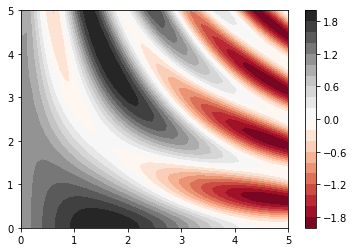

In [94]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

Please also explore how ``imshow`` works.

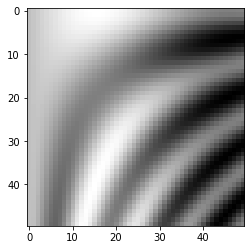

In [96]:
fig = plt.figure(frameon=False)
im1 = plt.imshow(Z, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

#### 2.4 Histograms

A simple histogram can be a great first step in understanding a dataset. Matplotlib can create a basic histogram using the command ``plt.hist()``:

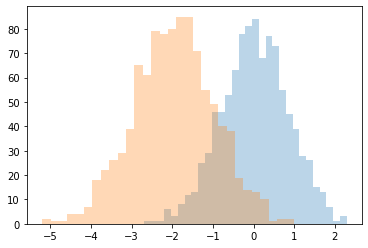

In [93]:
data1 = np.random.normal(0, 0.8, 1000) # Return a random sample from a normal (Gaussian) distribution
data2 = np.random.normal(-2, 1, 1000)
kwargs = dict(bins=30, alpha=0.3, histtype='bar')
plt.hist(data1, **kwargs) # Plot customized histograms
plt.hist(data2, **kwargs);

### 3. Seaborn

As Matplotlib is not designed for use with Pandas DataFrames, we must extract each Series and often concatenate them together into the right format in order to visualize data from a Pandas DataFrame. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot, such as [Seaborn](http://seaborn.pydata.org/), which has a lot of built-in styles for very high-quality plots.

Here we show a simple example of heatmap plotted by Seaborn.

Text(0.5, 1.0, 'Heatmap of MeltingPoint-Density and AtomicRadius')

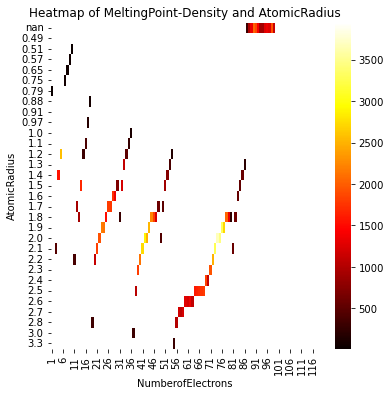

In [90]:
fig = plt.figure(figsize=(6,6))
heatmap_matrix = df.pivot('AtomicRadius', 'NumberofElectrons', 'MeltingPoint')
h = sns.heatmap(heatmap_matrix, cmap='hot')
h.set_title("Heatmap of MeltingPoint-Density and AtomicRadius")

In [53]:
heatmap_matrix

NumberofElectrons,1,2,3,4,5,6,7,8,9,10,...,109,110,111,112,113,114,115,116,117,118
AtomicRadius,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.75,NaN,NaN,NaN,NaN,NaN,NaN,63.29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.79,14.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.91,NaN,NaN,NaN,NaN,NaN,3948.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Interactive Matplotlib widget

We can use ``ipympl`` to enable usage of Matplotlib's interactive features. 
*Further reference: https://matplotlib.org/ipympl/*

First, load the widget by including the following magic command. 
*Further reference: https://towardsdatascience.com/top-8-magic-commands-in-jupyter-notebook-c1582e813560*

In [97]:
%matplotlib ipympl

Let's now work with a simple example and play around with some features as we do in the hands-on video.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
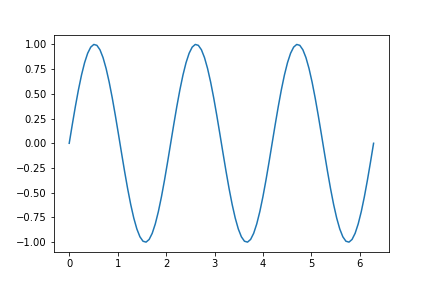

In [98]:
fig, ax = plt.subplots()

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

In addition to the Matplotlib interactive widget, JupyterLab offers a plethora of other useful extensions. The bottom-most icon on the far left (that looks like a piece of a puzzle) can be used to find add-ons that might prove very useful. Some examples are:
* plyto: Python Visualization Toolkit for Machine Learning and Data Exploration [https://github.com/jupytercalpoly/plyto]
* cvplot: The Contribution-Value plot is a visual encoding for interpreting machine learning models. [https://github.com/iamDecode/cvplot]
We encourage you to explore these (and other) features on your own!

## Supplementary Material 1: Navigating File Paths
Motivated by the ``savefig()`` example in Section 2.1, in this optional section, we get a quick understanding of how to answer the questions: *What if I want to save my figure in a subdirectory of the current working directory? What if I want to save my figure in a directory that is one level up? What if I want to save my figure in a completely-specified directory (i.e. absolute path)?*

This knowledge is useful beyond the motivating ``savefig()`` usage. For example, it can be used in the ``read_csv()`` part of the other Notebook for this week (*process_covid_data_2-fixed.ipynb*). Since the Linux operating system also uses a similar syntax to navigate file systems, this knowledge will also be useful in the next course of this series, where we will use UW's Linux-based supercomputer Hyak to perform Density Functional Theory calculations. 

For the purposes of this demonstration, let us assume we are working with the following file hierarchy (note: `Parent` is the default directory that JupyterLab opened into the first time you ran it; highest-level directory):
          
```
Parent (directory)
│   getting-started-guide_-_UW-JupyterHub-for-teaching.ipynb    
│
└───week2 (directory)
│   │   Janus_band_structure.csv
│   │   Week2_Python.ipynb
│   │   imposter.png (we will create this later!)
│    
└───week3 (directory)
    │   process_covid_data_2-fixed.ipynb
    │   Week3_Visualization.ipynb
    │   figure1fig.png
    │   
    └───random_folder (MAKE THIS DIRECTORY!)
        │   RANDOM_figure1fig.png
```


In [52]:
fig1.savefig('figure1fig.png') # Save figure "figure1fig.png" in the current working directory 
                                  # (i.e. the directory where the Notebook lives in,
                                        # which, in this case, is "week3")
        
# We use "../" to reference a directory one level up. 
fig1.savefig('../figure1fig.png') # Save figure in the parent directory, one level up.
                                        # In this case, it is "Parent".

# Now, create a subfolder named "random_folder" inside the "week3" directory.
fig1.savefig('random_folder/RANDOM_figure1fig.png') # Save figure as "RANDOM_figure1fig.png"
                                                        # inside "random_folder"

# Now, if you have a Notebook inside "random_folder" and you were running it from within,
    # you would use "../../" to refer to a directory/file that is two levels higher in the hierarchy.
    
# Finally, if you do not want to use relative paths (i.e. "../", etc), you could hard-code an absolute 
    # path as well. This takes a bit of work in JupyterLab. 
    # First, hover your mouse over the folder icon, as shown in the figure below. 
    # You will see the path to your Parent directory. In my case, it is "/home/jovyan".

FileNotFoundError: [Errno 2] No such file or directory: 'random_folder/RANDOM_figure1fig.png'

<img src="https://i.ibb.co/4mM10wQ/folder.png" alt="folder" border="0">

In [53]:
    # Then, go to the Parent directory, and right-click (or control+click) a different folder (ex: "week2") and click
    # "Copy Path" to get the folder's path. Then, combine the two paths and 
    # use it to save the figure as "imposter.png":
fig1.savefig('/home/jovyan/week2/imposter.png') # The leading "/" is important, as it refers to the 'root' directory!
    # The above is equivalent to using '../week2/imposter.png', when running from the "week3" directory.
    
# If someone has an easier way to do this on JupyterLab, please let us know!
# On a local machine, this step would probably involve something like "/Users/tharindu/Library/Figures/imposter.png"

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/week2/imposter.png'